In [1]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from copy import deepcopy
%matplotlib inline

C:\Users\Ryan\Anaconda2\envs\py3k\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('../datasets/Social_Network_Ads.csv')

In [3]:
features = ['Age','EstimatedSalary']
X = df[features]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
sc = StandardScaler()
# standardization
X_train_std = sc.fit_transform(X_train) 
X_test_std = sc.transform(X_test)

In [4]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_std, y_train)
y_pred = classifier.predict(X_test_std)

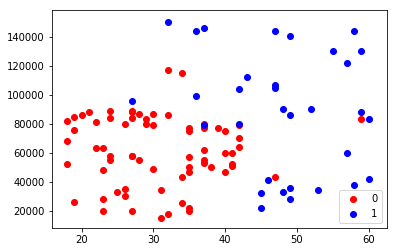

In [5]:
fig, ax = plt.subplots()
colors = ['r','b']
for l, c in zip(np.unique(y_pred),colors):
    ax.scatter(x=X_test[y_test==l].Age,y=X_test[y_test==l].EstimatedSalary,c=c,label=l)

ax.legend(loc=4)

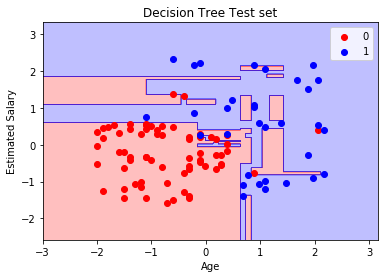

In [6]:
# nicer visual
X_set, y_set = X_test_std, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

fig, ax = plt.subplots()
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'blue')))

colors = ['r','b']
for l, c in zip(np.unique(y_pred),colors):
    plt.scatter(x=X_set[y_test==l,0],y=X_set[y_test==l,1],c=c,label=l)
    
plt.title('Decision Tree Test set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

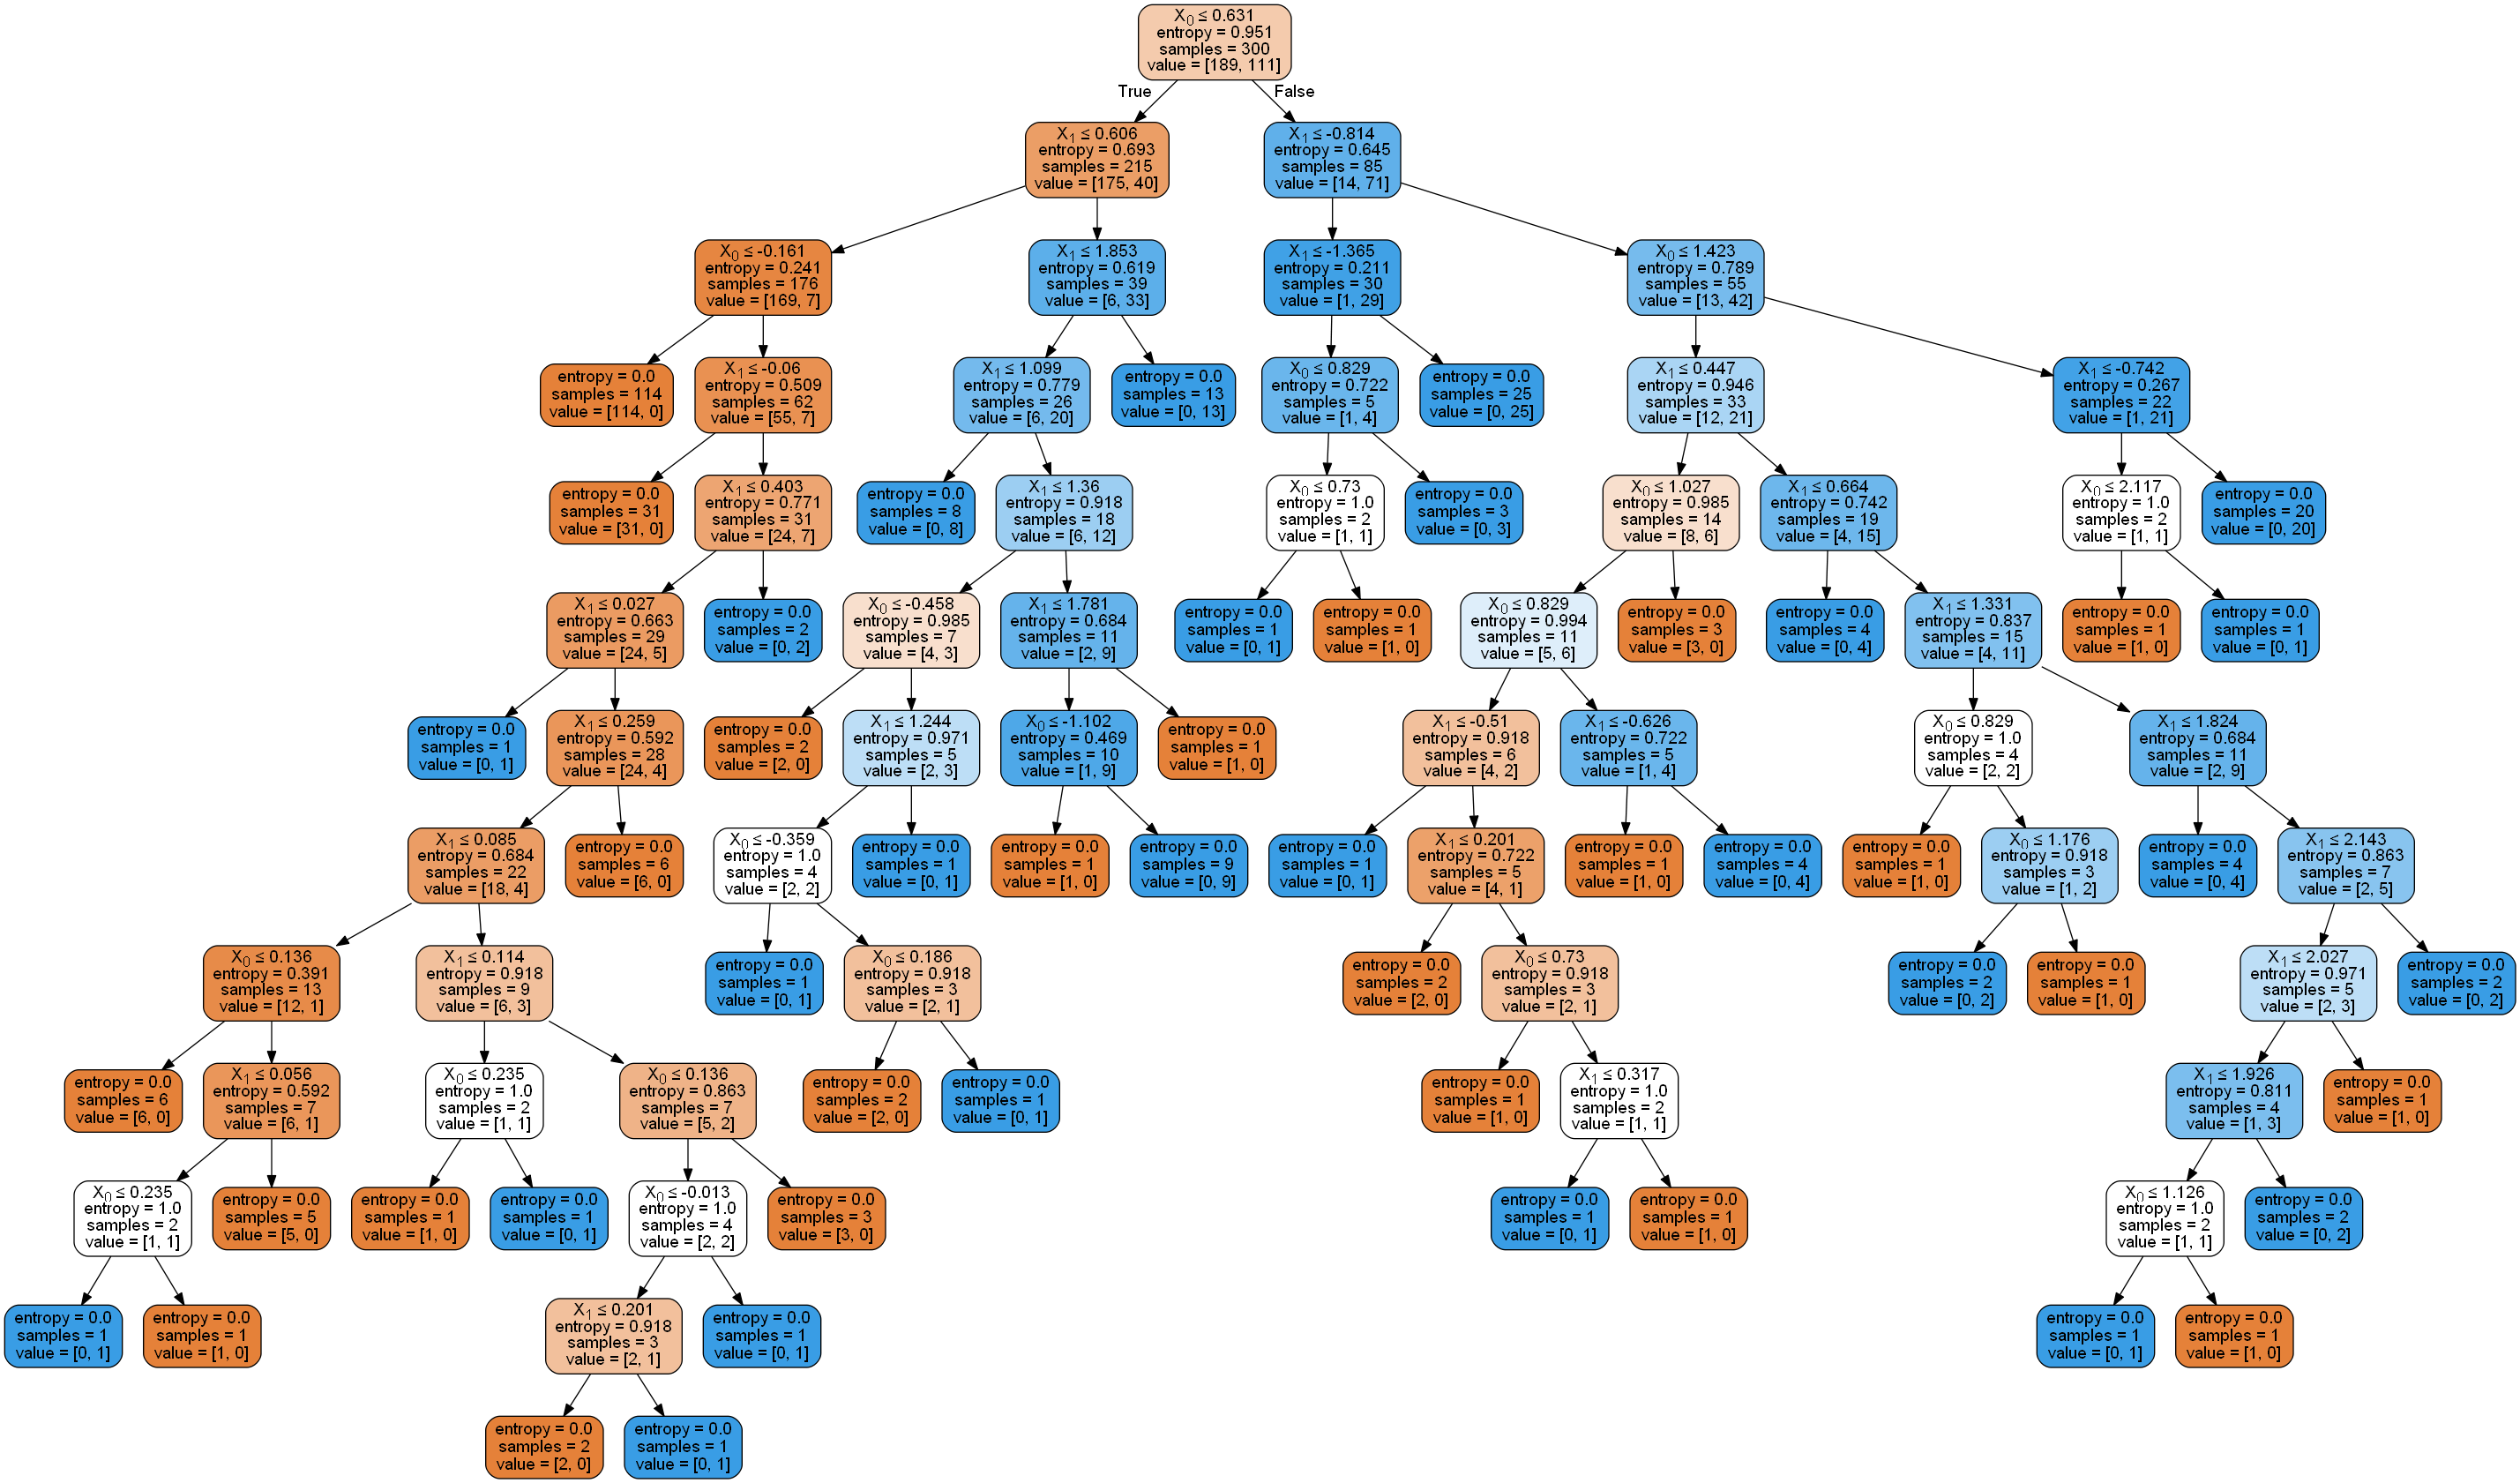

In [7]:
# visualize 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [8]:
# a more robust decision tree
# the previous model has many leaf nodes consist of only 1 observation, and the model is more likely to capture noise not real pattern 
# in other words, the result is less generalizable to unseen data 

classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, min_samples_leaf = 5)
classifier1.fit(X_train_std, y_train)
y_pred1 = classifier1.predict(X_test_std)

classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, min_samples_leaf = 10)
classifier2.fit(X_train_std, y_train)
y_pred2 = classifier1.predict(X_test_std)

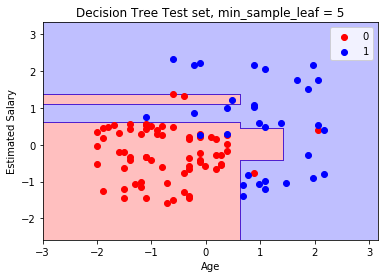

In [9]:
fig, ax = plt.subplots()
plt.contourf(X1, X2, classifier1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'blue')))

colors = ['r','b']
for l, c in zip(np.unique(y_pred),colors):
    plt.scatter(x=X_set[y_test==l,0],y=X_set[y_test==l,1],c=c,label=l)
    
plt.title('Decision Tree Test set, min_sample_leaf = 5')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

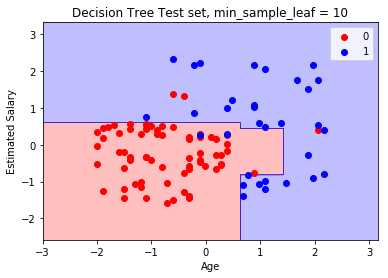

In [10]:
fig, ax = plt.subplots()
plt.contourf(X1, X2, classifier2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'blue')))

colors = ['r','b']
for l, c in zip(np.unique(y_pred),colors):
    plt.scatter(x=X_set[y_test==l,0],y=X_set[y_test==l,1],c=c,label=l)
    
plt.title('Decision Tree Test set, min_sample_leaf = 10')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

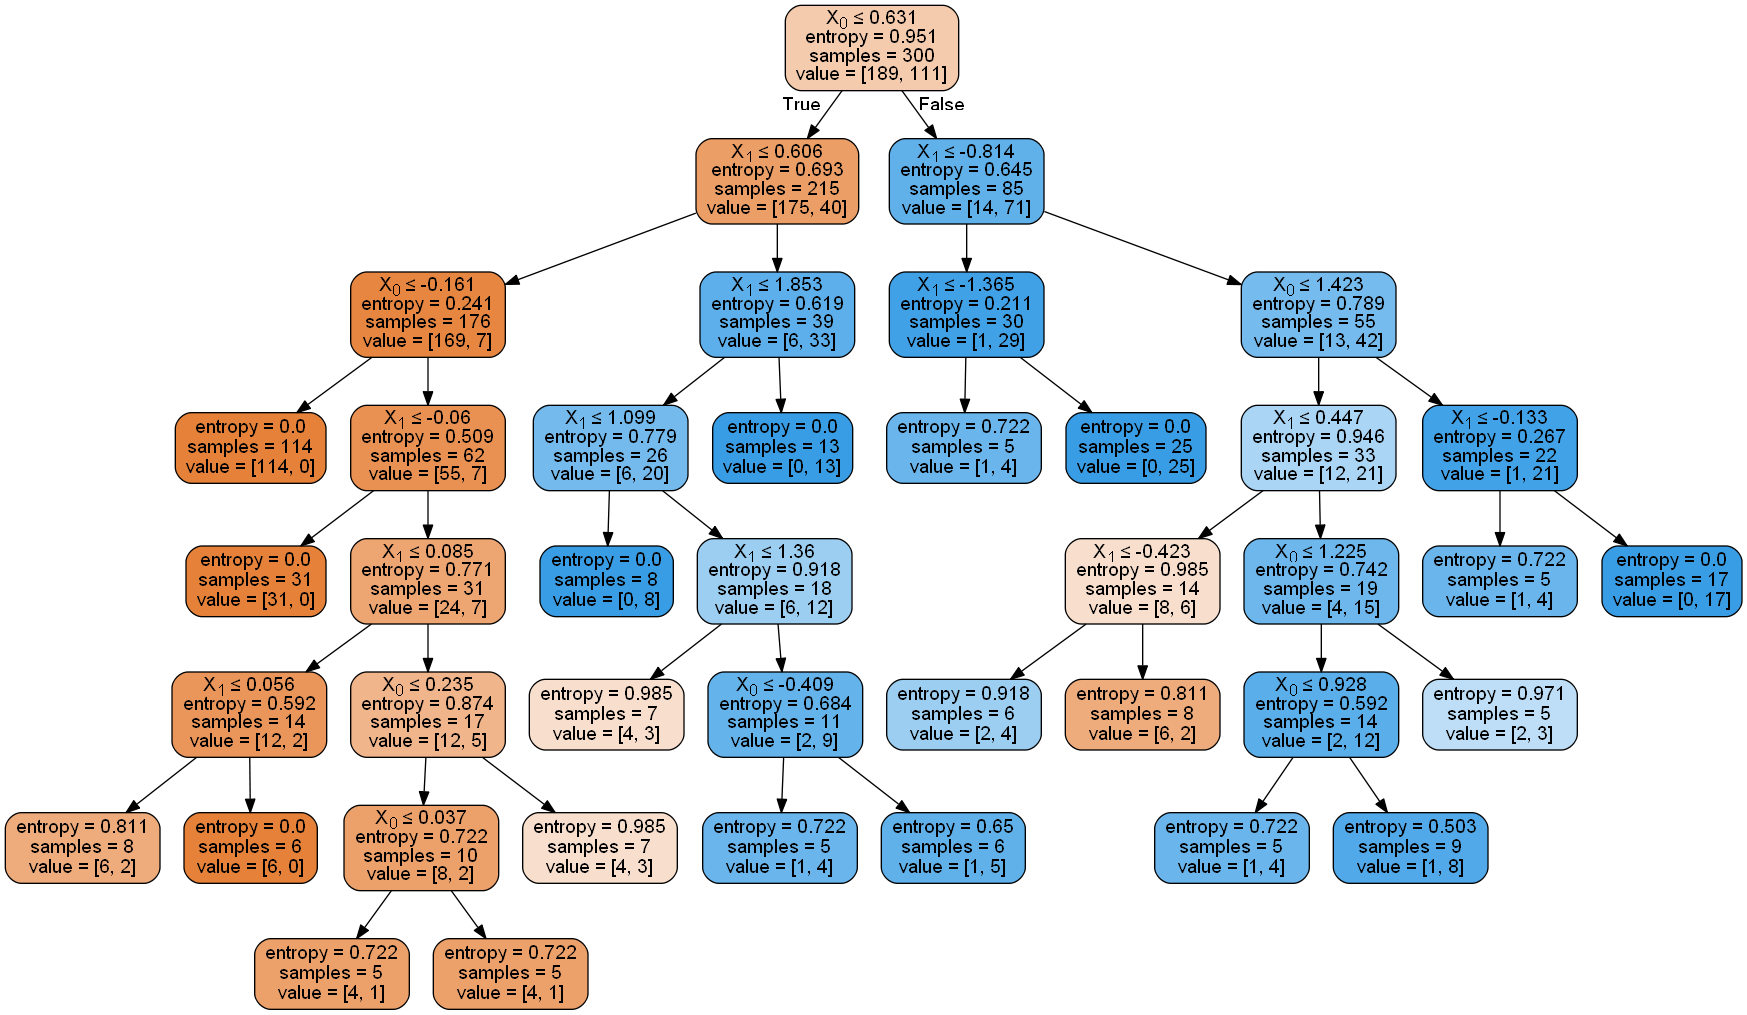

In [11]:
dot_data = StringIO()
export_graphviz(classifier1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

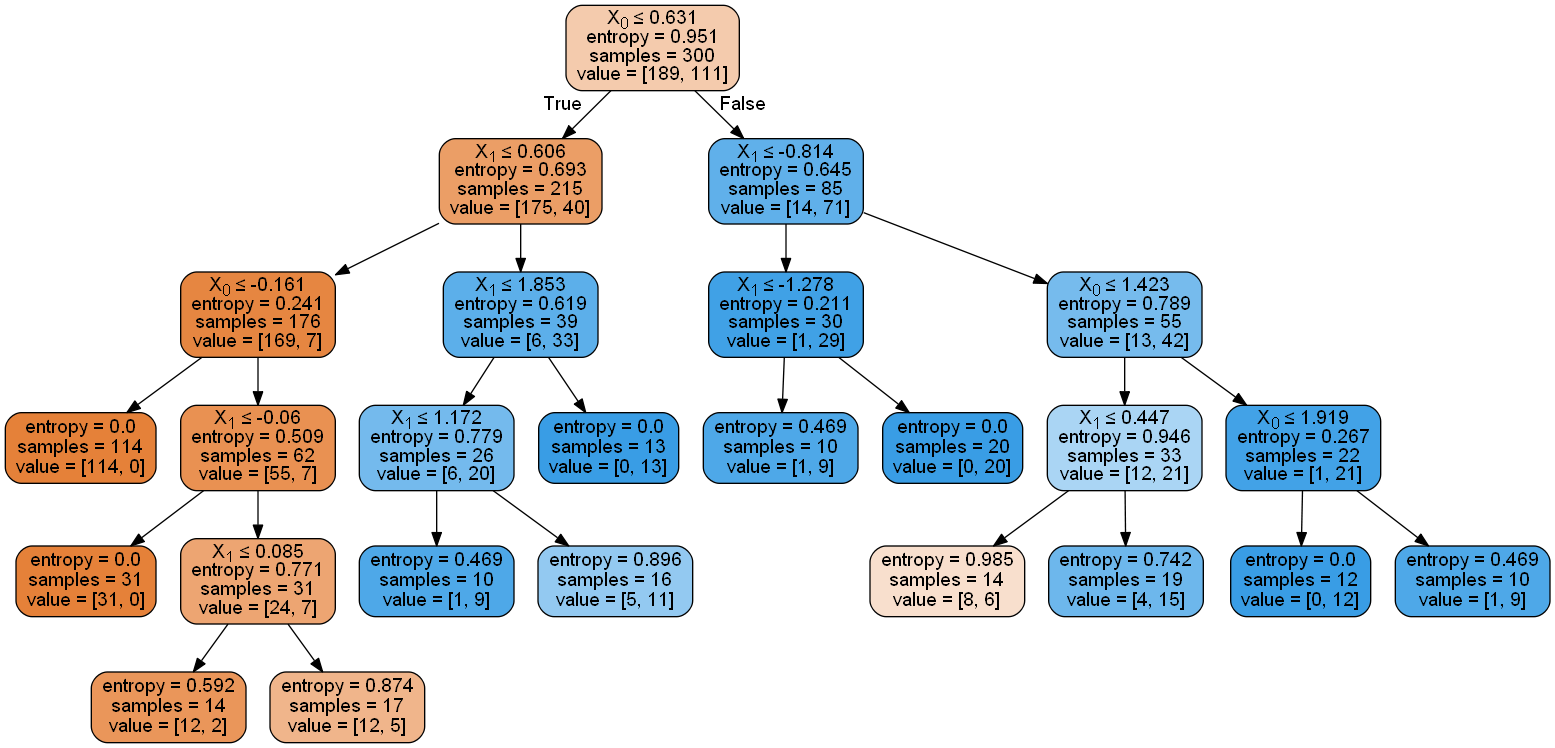

In [12]:
dot_data = StringIO()
export_graphviz(classifier2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())